In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "ebay_cleaned.csv"
ebay_df = pd.read_csv(file_path)

# Find Best-Selling Items & Categories

In [3]:
# Top 10 best-selling items by total revenue
top_items = ebay_df.groupby("Title")["Price"].sum().sort_values(ascending=False).head(10).to_frame()
top_items.columns = ["Total Revenue ($)"]
top_items.index.name = "Item Name"

# Top 10 best-selling categories
top_categories = ebay_df.groupby("Categories")["Price"].sum().sort_values(ascending=False).head(10).to_frame()
top_categories.columns = ["Total Revenue ($)"]
top_categories.index.name = "Category"

# Display in a clean format
print("\n🔹 Top-Selling Items:")
display(top_items.style.format({"Total Revenue ($)": "{:,.2f}"}))

print("\n🔹 Top-Selling Categories:")
display(top_categories.style.format({"Total Revenue ($)": "{:,.2f}"}))



🔹 Top-Selling Items:


,Total Revenue ($)
Item Name,
Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,"19,696.88"
Apple MacBook M4 Pro Notebook NEW,"1,200.00"
Harry Potter and the Goblet of Fire - First Edition,"1,099.99"
MacBook Air 13-inch 2024 M3 / 16GB RAM / 512GB SSD / 10-Core GPU / Space Gray,"1,029.00"
2024 Apple MacBook Air 13-inch M3 Chip 16GB RAM 256GB SSD Midnight MC8K4LL/A,859.00
Apple MacBook Pro MB990LL/A 13.3 in2131313. Notebook NEW,647.00
Apple MacBook Pro 13.3,600.00
Apple MacBook Pro MB990LL/A 15.3 in. Notebook NEW,600.00
NEW Top,500.00



🔹 Top-Selling Categories:


,Total Revenue ($)
Category,
"Apple Laptops, Computers/Tablets & Networking, Laptops & Netbooks","35,012.39"
"PC Laptops & Netbooks, Computers/Tablets & Networking, Laptops & Netbooks",598.17
"Motherboards, Computers/Tablets & Networking, Computer Components & Parts",207.40
"Laptop Screens & LCD Panels, Computers/Tablets & Networking, Computer Components & Parts, Laptop Replacement Parts",51.00


# Sales Distribution Across Regions

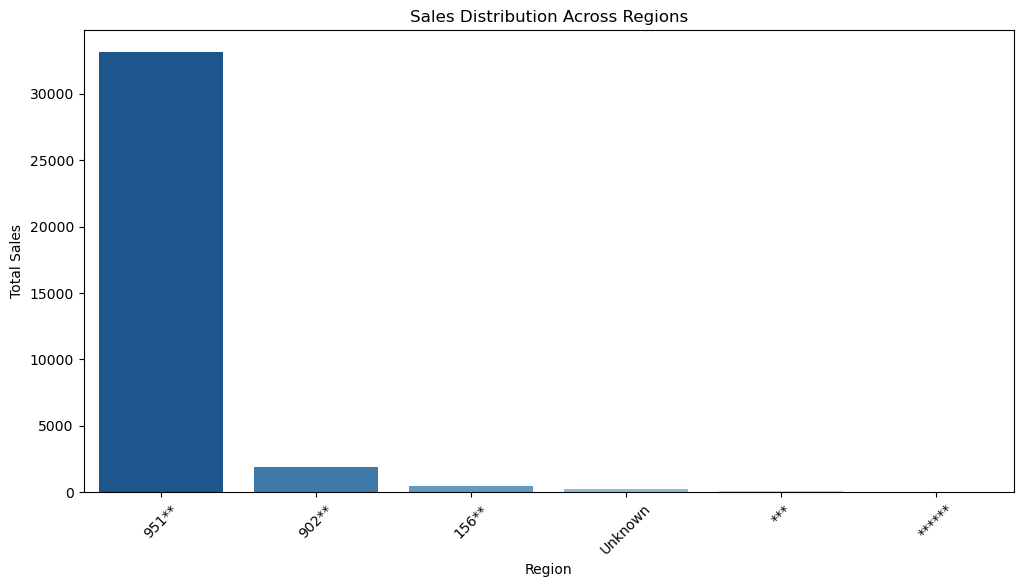

In [4]:
# Aggregate sales by region
region_sales = ebay_df.groupby("Item Location")["Price"].sum().sort_values(ascending=False)

# Plot sales distribution by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")

# Formatting
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales Distribution Across Regions")
plt.xticks(rotation=45)
plt.show()


# Revenue Contribution by Product

In [6]:
# Calculate revenue percentage per product
ebay_df["Revenue Share"] = ebay_df["Price"] / ebay_df["Price"].sum() * 100

# Top 10 products by revenue contribution
top_revenue_products = (
    ebay_df.groupby("Title")["Revenue Share"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

top_revenue_products.columns = ["Revenue Contribution (%)"]
top_revenue_products.index.name = "Product"

# Display in a clean format
print("\n🔹 Top Revenue-Contributing Products:")
display(top_revenue_products.style.format({"Revenue Contribution (%)": "{:.2f}%"}))


🔹 Top Revenue-Contributing Products:


,Revenue Contribution (%)
Product,
Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,54.91%
Apple MacBook M4 Pro Notebook NEW,3.35%
Harry Potter and the Goblet of Fire - First Edition,3.07%
MacBook Air 13-inch 2024 M3 / 16GB RAM / 512GB SSD / 10-Core GPU / Space Gray,2.87%
2024 Apple MacBook Air 13-inch M3 Chip 16GB RAM 256GB SSD Midnight MC8K4LL/A,2.39%
Apple MacBook Pro MB990LL/A 13.3 in2131313. Notebook NEW,1.80%
Apple MacBook Pro 13.3,1.67%
Apple MacBook Pro MB990LL/A 15.3 in. Notebook NEW,1.67%
NEW Top,1.39%
